### Analysis1: Basic break even analysis

In [1]:
# Importing the required libraries
import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection._search import ParameterGrid

In [2]:
%matplotlib inline

### 1a) Creating Base Model

In [3]:
# Importing required packages from hw2_juhi_gujarathi_aap (i.e. Whatif)
from hw2_juhi_gujarathi_aap import Model
from hw2_juhi_gujarathi_aap import get_sim_results_df

In [4]:

class SingleProductSPF(Model):
    """Base Model"""
    def __init__(self, fixed_cost=5000, var_cost=100, selling_price=115, 
                 spf_constant=4900, spf_linear=-35, spf_quadratic=0.06):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
            
    def Demand(self):
        """Compute Demand"""
        return (self.spf_quadratic * (self.selling_price**2)) + (self.spf_linear * self.selling_price) + self.spf_constant
    
    def order_cost(self):
        """Compute total order cost"""
        return self.fixed_cost + (self.Demand() *self.var_cost)
    
    def sales_revenue(self):
        """Compute sales revenue"""
        return self.Demand() * self.selling_price
    
    def profit(self):
        '''
        Compute profit in bookstore model
        '''
        profit = self.sales_revenue() - self.order_cost()
        return profit

In [5]:
Model1 = SingleProductSPF()
print(Model1)
print(Model1.Demand())
print(Model1.profit())

{'fixed_cost': 5000, 'var_cost': 100, 'selling_price': 115, 'spf_constant': 4900, 'spf_linear': -35, 'spf_quadratic': 0.06}
1668.5
20027.5


### 1b) 1-way Data Table

In [6]:
# Specify input ranges for scenarios (dictionary)
# 1-way table
dt_param_ranges_1 = {'selling_price': np.arange(80, 141, 10)}

# Specify desired outputs (list)
outputs = ['profit', 'Demand']

# Use data_table function to create 1-way data table
m1_dt1_df = Model.data_table(Model1, dt_param_ranges_1, outputs)
m1_dt1_df

,selling_price,profit,Demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0


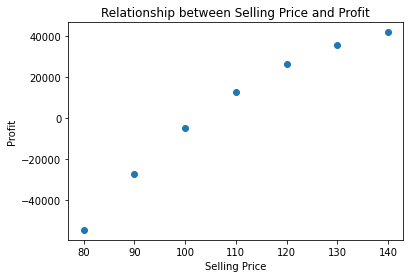

In [7]:
plt.scatter(m1_dt1_df.selling_price, m1_dt1_df.profit)
plt.title("Relationship between Selling Price and Profit")
plt.xlabel("Selling Price")
plt.ylabel("Profit")
plt.show()

From the above graph we can see that there is a linear relationship between Selling Price and Profit. 

### 1c) Break Even

In [8]:
Model.goal_seek(Model1, 'profit', 0, 'selling_price', 80, 140)

102.57578606424767

### 1d) 2-Way Data Table

In [9]:
dt_param_ranges_2 = {'selling_price': np.arange(80, 141, 10),
                     'var_cost': np.arange(85, 111, 5)}

# Specify desired outputs (list)
outputs = ['profit', 'order_cost']

# Use data_table function to create 2-way data table
m1_dt2_df = Model.data_table(Model1, dt_param_ranges_2, outputs)
m1_dt2_df

,selling_price,var_cost,profit,order_cost
0,80,85,-17420.0,216140.0
1,80,90,-29840.0,228560.0
2,80,95,-42260.0,240980.0
3,80,100,-54680.0,253400.0
4,80,105,-67100.0,265820.0
5,80,110,-79520.0,278240.0
6,90,85,6180.0,195060.0
7,90,90,-5000.0,206240.0
8,90,95,-16180.0,217420.0
9,90,100,-27360.0,228600.0


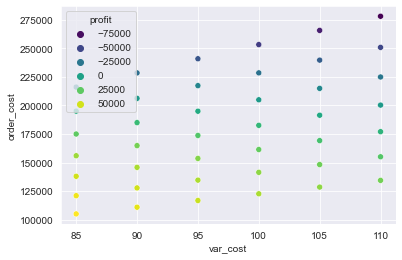

In [10]:
sns.set_style("darkgrid")
sns.scatterplot(x="var_cost", y="order_cost", hue="profit", data=m1_dt2_df, palette="viridis");

### 1e) Digging Deeper

In [11]:
# Goal seek by changing selling price to $80-$250
Model.goal_seek(Model1, 'profit', 0, 'selling_price', 80, 250)

1-way Data Table using selling price range as $80-$250

In [12]:
# Specify input ranges for scenarios 
# 1-way table
dt_param_ranges_3 = {'selling_price': np.arange(80, 251, 10)}

# Specify desired outputs (list)
outputs = ['profit', 'Demand']

# Use data_table function to create 1-way data table
m3_dt1_df = Model.data_table(Model1, dt_param_ranges_3, outputs)
m3_dt1_df

,selling_price,profit,Demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0
7,150,45000.0,1000.0
8,160,45160.0,836.0
9,170,42880.0,684.0


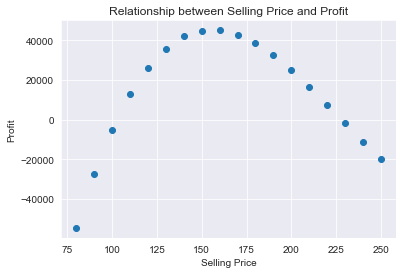

In [13]:
plt.scatter(m3_dt1_df.selling_price, m3_dt1_df.profit)
plt.title("Relationship between Selling Price and Profit")
plt.xlabel("Selling Price")
plt.ylabel("Profit")
plt.show()

#### Conclusion: Earlier there was a linear relationship between Selling price and profit but in this case, the profit is decreasing as selling price is increasing. I believe, this is the reason we are not getting goal seek value.

### 1f) Simulation

In [14]:
from numpy.random import default_rng
rg = default_rng(4470)
rg.random()
num_reps = 150
random_inputs = {'var_cost': rg.uniform(80, 120, num_reps)}
scenario_inputs = {'selling_price': np.arange(80, 121, 10)}
list(ParameterGrid(scenario_inputs))
sim_outputs = ['profit']

model_Simulate = Model.simulate(Model1, random_inputs, sim_outputs, scenario_inputs)
print(model_Simulate)

[{'scenario_base_vals': {'fixed_cost': 5000, 'var_cost': 100, 'selling_price': 115, 'spf_constant': 4900, 'spf_linear': -35, 'spf_quadratic': 0.06}, 'scenario_num': 0, 'scenario_vals': {'selling_price': 80}, 'output': {'profit': array([ -19925.61351437,  -26051.17534984,  -39043.52695726,
        -97835.21450608,  -75731.71941757,  -76474.45648742,
        -66875.52516019,  -43104.5171831 ,  -12403.79660743,
        -10635.90278169,  -94580.17787672,   -6676.31865015,
        -37561.37728561,   -7664.75916636,  -11714.82170495,
        -25074.15120991,  -85813.88461531,  -26057.42864698,
        -91011.3028375 , -102342.87024895,  -90293.25062384,
        -24441.07054506,  -72528.40060488,  -93321.1650068 ,
        -61868.48340327,  -37859.93140512,   -7216.9284641 ,
        -59535.51022715,  -63270.96312407,  -73338.64930895,
        -12069.52784384,  -97142.58548838,  -80444.09422471,
        -85171.58538146,  -61914.82151575,  -64311.01845547,
        -93282.80321074,  -21558.917622

In [15]:
# Get the result object into dataframe
def get_sim_results_df(results):
    
    dfs = []    
    for r in results:
        df = pd.DataFrame(r['output'])
        df['scenario_num'] = r['scenario_num']
        for key, val in r['scenario_vals'].items():
            df[key] = val
            
        dfs.append(df)

    results_df = pd.concat(dfs)
    
    return results_df

# Dataframe
model_Simulate_df = get_sim_results_df(model_Simulate)
model_Simulate_df

,profit,scenario_num,selling_price
0,-19925.613514,0,80
1,-26051.175350,0,80
2,-39043.526957,0,80
3,-97835.214506,0,80
4,-75731.719418,0,80
...,...,...,...
145,10728.204038,4,120
146,44793.414885,4,120
147,47909.495969,4,120
148,47539.101902,4,120


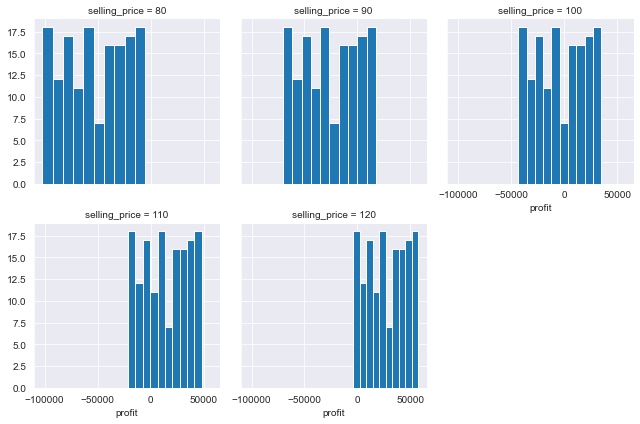

In [16]:
# creating histogram
profit_histogram = sns.FacetGrid(model_Simulate_df, col='selling_price', sharey=True, col_wrap=3)
profit_histogram = profit_histogram.map(plt.hist, "profit")

Calculating the probability when profit is negative

In [18]:
# Probability profit is negative
from scipy import stats
print((stats.percentileofscore(model_Simulate_df.profit, 0) - stats.percentileofscore(model_Simulate_df.profit, -100000)) / 100.0)

0.532
